2.3基本遗传算法示例

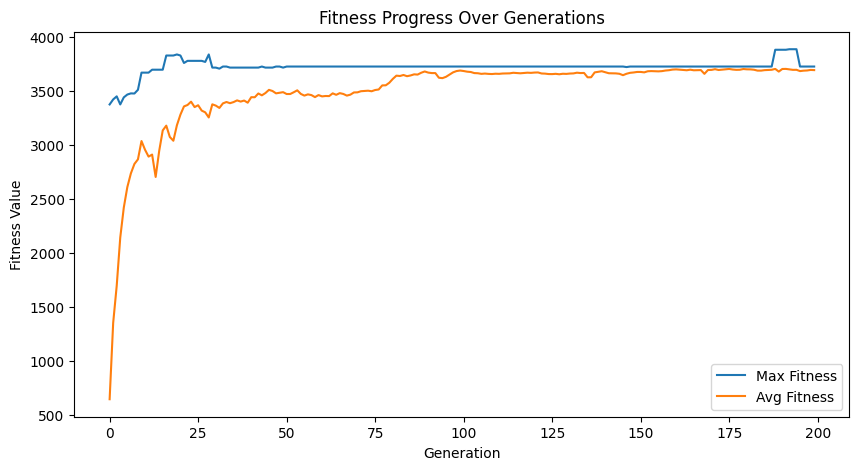

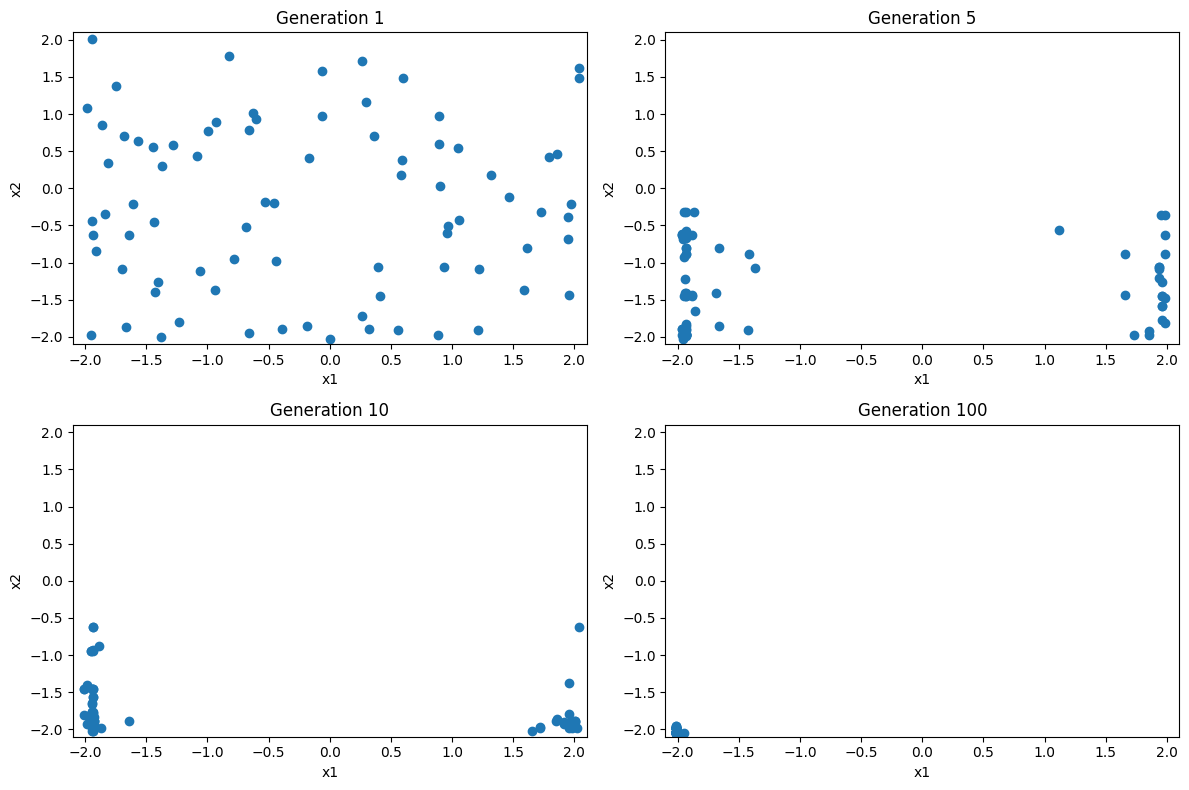

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
# Rosenbrock函数定义
def rosenbrock(x1, x2):
    return 100 * (x1**2 - x2)**2 + (1 - x1)**2

# 将二进制表示转换为实际值的函数
def decode(x):
    return 4.096 * x / 1023 - 2.048

# 初始化种群
def initialize_population(M, n_bits):
    return np.random.randint(0, 2, size=(M, n_bits * 2))  # 80个个体，每个个体的编码为20位（10位x1 + 10位x2）

# 计算适应度
def fitness(population):
    # 将二进制编码转换为十进制
    y1 = population[:, :10].dot(1 << np.arange(9, -1, -1))  # 前10位为x1的二进制编码
    y2 = population[:, 10:].dot(1 << np.arange(9, -1, -1))  # 后10位为x2的二进制编码
    
    # 将十进制值转换为实际的x1, x2
    x1 = decode(y1)
    x2 = decode(y2)
    
    # 计算Rosenbrock函数值，作为适应度
    return np.array([rosenbrock(x1[i], x2[i]) for i in range(len(population))])

# 选择操作（轮盘赌选择）
def selection(population, fitness_values):
    total_fitness = np.sum(fitness_values)
    probabilities = fitness_values / total_fitness
    indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return population[indices]

# 交叉操作（单点交叉）
def crossover(population, p_c):
    new_population = population.copy()
    for i in range(0, len(population), 2):
        if np.random.rand() < p_c:
            crossover_point = np.random.randint(1, population.shape[1])  # 选择交叉点
            new_population[i, crossover_point:], new_population[i+1, crossover_point:] = \
                new_population[i+1, crossover_point:].copy(), new_population[i, crossover_point:].copy()
    return new_population

# 变异操作（单点变异）
def mutation(population, p_m):
    for i in range(len(population)):
        if np.random.rand() < p_m:
            mutation_point = np.random.randint(0, population.shape[1])  # 随机选择变异点
            population[i, mutation_point] = 1 - population[i, mutation_point]  # 变异操作
    return population

# 主遗传算法过程
def genetic_algorithm(M, T, p_c, p_m, n_bits):
    population = initialize_population(M, n_bits)
    max_fitness_values = []
    avg_fitness_values = []
    generations_x1_x2 = []

    for t in range(T):
        # 计算适应度
        fitness_values = fitness(population)
        max_fitness_values.append(np.max(fitness_values))
        avg_fitness_values.append(np.mean(fitness_values))
        
        # 记录每一代的种群的x1和x2值
        y1 = population[:, :10].dot(1 << np.arange(9, -1, -1))
        y2 = population[:, 10:].dot(1 << np.arange(9, -1, -1))
        x1 = decode(y1)
        x2 = decode(y2)
        generations_x1_x2.append((x1, x2))

        # 选择操作
        population = selection(population, fitness_values)

        # 交叉操作
        population = crossover(population, p_c)

        # 变异操作
        population = mutation(population, p_m)

    return max_fitness_values, avg_fitness_values, generations_x1_x2

# 参数设置
M = 80  # 种群大小
T = 200  # 终止代数
p_c = 0.6  # 交叉概率
p_m = 0.001  # 变异概率
n_bits = 10  # 每个x1和x2的二进制位数

# 运行遗传算法
max_fitness_values, avg_fitness_values, generations_x1_x2 = genetic_algorithm(M, T, p_c, p_m, n_bits)

# 绘制最大值和平均值的变化
plt.figure(figsize=(10, 5))
plt.plot(max_fitness_values, label="Max Fitness")
plt.plot(avg_fitness_values, label="Avg Fitness")
plt.xlabel('Generation')
plt.ylabel('Fitness Value')
plt.title('Fitness Progress Over Generations')
plt.legend()
plt.show()

# 绘制初代、第五代、第十代、第一百代的种群分布
generations_to_plot = [0, 4, 9, 99]
plt.figure(figsize=(12, 8))

for i, gen in enumerate(generations_to_plot):
    x1, x2 = generations_x1_x2[gen]
    plt.subplot(2, 2, i+1)
    plt.scatter(x1, x2)
    plt.title(f'Generation {gen+1}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-2.1, 2.1)  
    plt.ylim(-2.1, 2.1)  

plt.tight_layout()
plt.show()

4.4小生境遗传算法示例

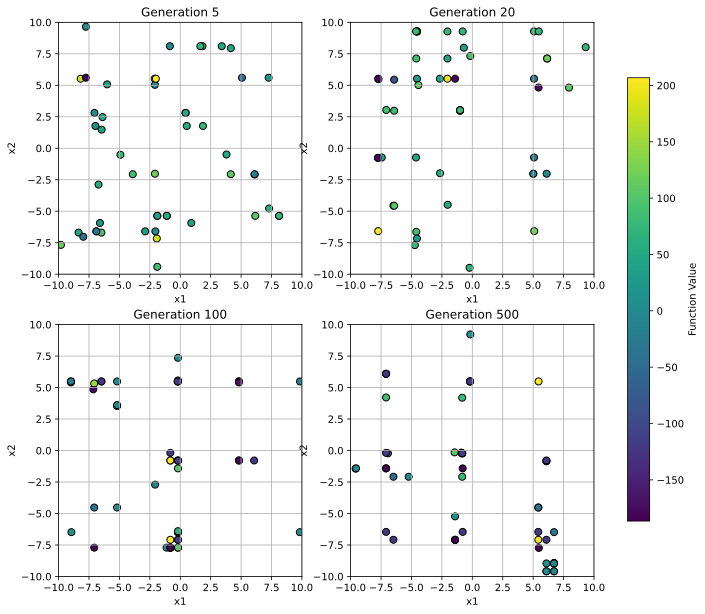

Top 20 local optima:
1: x1 = -7.0870, x2 = 4.8583, f(x1, x2) = -186.7038
2: x1 = -7.7126, x2 = 5.4839, f(x1, x2) = -186.6857
3: x1 = -7.7126, x2 = -7.0870, f(x1, x2) = -186.6610
4: x1 = -7.0870, x2 = -7.7126, f(x1, x2) = -186.6610
5: x1 = -1.4174, x2 = 5.4839, f(x1, x2) = -186.5892
6: x1 = -0.7918, x2 = 4.8583, f(x1, x2) = -186.5702
7: x1 = -1.4174, x2 = -7.0870, f(x1, x2) = -186.5644
8: x1 = -7.0870, x2 = -1.4174, f(x1, x2) = -186.5644
9: x1 = -0.7918, x2 = -7.7126, f(x1, x2) = -186.5273
10: x1 = -7.7126, x2 = -0.7918, f(x1, x2) = -186.5273
11: x1 = -1.4174, x2 = -0.7918, f(x1, x2) = -186.4309
12: x1 = -0.7918, x2 = -1.4174, f(x1, x2) = -186.4309
13: x1 = 5.4643, x2 = 4.8583, f(x1, x2) = -185.9695
14: x1 = 5.4643, x2 = -7.7126, f(x1, x2) = -185.9268
15: x1 = 4.8387, x2 = 5.4839, f(x1, x2) = -185.8621
16: x1 = 4.8387, x2 = -7.0870, f(x1, x2) = -185.8375
17: x1 = 5.4643, x2 = -1.4174, f(x1, x2) = -185.8307
18: x1 = 4.8387, x2 = -0.7918, f(x1, x2) = -185.7045
19: x1 = 6.0899, x2 = 5.4839

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
# Shubert函数定义
def shubert(x1, x2):
    sum1 = sum(i * np.cos((i + 1) * x1 + i) for i in range(1, 6))
    sum2 = sum(i * np.cos((i + 1) * x2 + i) for i in range(1, 6))
    return sum1 * sum2

# 适应度转换函数
def fitness_function(x1, x2):
    f_val = shubert(x1, x2)
    return 1 - 0.05 * f_val if f_val < 0 else 1

# 二进制解码函数
def decode(binary, bounds):
    n_bits = len(binary)
    decimal = binary.dot(1 << np.arange(n_bits)[::-1])
    return bounds[0] + (bounds[1] - bounds[0]) * decimal / (2**n_bits - 1)

# 初始化种群
def initialize_population(M, n_bits):
    return np.random.randint(0, 2, size=(M, n_bits * 2))

# 计算适应度
def calculate_fitness(population, bounds):
    n_bits = population.shape[1] // 2
    x1 = np.array([decode(individual[:n_bits], bounds) for individual in population])
    x2 = np.array([decode(individual[n_bits:], bounds) for individual in population])
    f_values = np.array([shubert(x1[i], x2[i]) for i in range(len(population))])
    fitness_values = np.array([fitness_function(x1[i], x2[i]) for i in range(len(population))])
    return fitness_values, f_values, x1, x2

# 选择操作（轮盘赌选择）
def selection(population, fitness_values):
    probabilities = fitness_values / np.sum(fitness_values)
    indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return population[indices]

# 交叉操作（单点交叉）
def crossover(population, p_c):
    new_population = population.copy()
    for i in range(0, len(population), 2):
        if np.random.rand() < p_c:
            crossover_point = np.random.randint(1, population.shape[1])
            new_population[i, crossover_point:], new_population[i+1, crossover_point:] = \
                new_population[i+1, crossover_point:].copy(), new_population[i, crossover_point:].copy()
    return new_population

# 变异操作（单点变异）
def mutation(population, p_m):
    for i in range(len(population)):
        if np.random.rand() < p_m:
            mutation_point = np.random.randint(0, population.shape[1])
            population[i, mutation_point] = 1 - population[i, mutation_point]
    return population

# 小生境淘汰运算
def niche_elimination(population, fitness_values, f_values, memory_population, memory_fitness, memory_f_values, bounds, L, penalty, N):
    combined_population = np.vstack((population, memory_population))
    combined_fitness = np.hstack((fitness_values, memory_fitness))
    combined_f_values = np.hstack((f_values, memory_f_values))

    n_bits = population.shape[1] // 2
    combined_x1 = np.array([decode(ind[:n_bits], bounds) for ind in combined_population])
    combined_x2 = np.array([decode(ind[n_bits:], bounds) for ind in combined_population])

    for i in range(len(combined_population)):
        for j in range(i + 1, len(combined_population)):
            #欧几里得距离并不能将点分开
            #d = np.linalg.norm(combined_population[i] - combined_population[j])
            d = np.linalg.norm(np.array([combined_x1[i], combined_x2[i]]) - np.array([combined_x1[j], combined_x2[j]]))
            if d < L:
                if combined_fitness[i] < combined_fitness[j]:
                    combined_fitness[i] = penalty
                else:
                    combined_fitness[j] = penalty

    sorted_indices = np.argsort(-combined_fitness)
    #重新拿出M个个体
    sorted_population = combined_population[sorted_indices][:len(population)]
    sorted_memory_population = combined_population[sorted_indices][:N]
    sorted_memory_fitness = combined_fitness[sorted_indices][:N]
    sorted_memory_f_values = combined_f_values[sorted_indices][:N]

    return sorted_population, sorted_memory_population, sorted_memory_fitness, sorted_memory_f_values

# 主遗传算法过程
def genetic_algorithm(bounds, M, T, p_c, p_m, n_bits, L, penalty, N):
    population = initialize_population(M, n_bits)
    fitness_values, f_values, x1, x2 = calculate_fitness(population, bounds)

    memory_indices = np.argsort(-fitness_values)[:N]
    memory_population = population[memory_indices]
    memory_fitness = fitness_values[memory_indices]
    memory_f_values = f_values[memory_indices]

    all_generations = {}

    for t in range(1, T+1):
        # 遗传算子操作
        population = selection(population, fitness_values)
        population = crossover(population, p_c)
        population = mutation(population, p_m)

        fitness_values, f_values, x1, x2 = calculate_fitness(population, bounds)

        if t in [5, 20, 100, 500]:
            all_generations[t] = (x1, x2, f_values)

        # 小生境运算
        population, memory_population, memory_fitness, memory_f_values = niche_elimination(
            population, fitness_values, f_values, memory_population, memory_fitness, memory_f_values, bounds, L, penalty, N
        )

    final_fitness, final_f_values, final_x1, final_x2 = calculate_fitness(population, bounds)
    sorted_indices = np.argsort(final_f_values)
    best_solutions = [(final_x1[i], final_x2[i], final_f_values[i]) for i in sorted_indices[:20]]

    return best_solutions, all_generations

# 参数设置
bounds = [-10, 10]
M = 50  # 种群大小
T = 500  # 迭代次数
p_c = 0.8  # 交叉概率
p_m = 0.1  # 变异概率
n_bits = 10  # 每个变量的二进制位数
L = 0.5  # 小生境距离参数
penalty = 1e-30  # 惩罚因子
N = 30  # 记忆的局部最优个体数

# 运行遗传算法
best_solutions, all_generations = genetic_algorithm(
    bounds, M, T, p_c, p_m, n_bits, L, penalty, N
)

# 绘制热图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
generation_keys = [5, 20, 100, 500]

for ax, t in zip(axes.flatten(), generation_keys):
    x1, x2, f_values = all_generations[t]
    sc = ax.scatter(x1, x2, c=f_values, cmap='viridis', s=50, edgecolors='k')
    ax.set_title(f'Generation {t}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xlim(bounds[0], bounds[1])
    ax.set_ylim(bounds[0], bounds[1])
    ax.grid(True)

fig.colorbar(sc, ax=axes[:, :], shrink=0.8, label='Function Value')
plt.show()

# 输出前20个局部最优解
print("Top 20 local optima:")
for i, solution in enumerate(best_solutions):
    x1, x2, f_val = solution
    print(f"{i + 1}: x1 = {x1:.4f}, x2 = {x2:.4f}, f(x1, x2) = {f_val:.4f}")

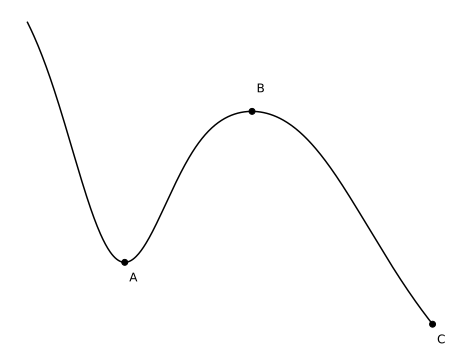

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar, minimize

# Define the function
def E(x):
    return -np.exp(-0.5 * (x - 2)**2) + 0.5 * np.exp(-0.2 * (x - 6)**2) - 0.2 * x + 1

# Find the global minimum (point A)
result_min = minimize_scalar(E, bounds=(0, 10), method='bounded')
min_x = result_min.x
min_y = E(min_x)

# Find the local maximum (point B) using a different method
# We will use a grid search to find potential maxima and then refine using minimize
x_values = np.linspace(0, 10, 500)
y_values = E(x_values)

# Find approximate location of local maxima
local_max_indices = np.where(np.diff(np.sign(np.diff(y_values))) == -2)[0] + 1
local_max_points = x_values[local_max_indices]

# Evaluate second derivative to confirm maxima
second_derivative = np.gradient(np.gradient(y_values, x_values), x_values)

# Filter out true maxima
true_maxima = []
for idx in local_max_indices:
    if second_derivative[idx] < 0:
        true_maxima.append(x_values[idx])

# Choose the highest local maximum (point B)
if true_maxima:
    max_x = max(true_maxima)
    max_y = E(max_x)
else:
    # Fallback manual setting for maximum
    max_x = 6
    max_y = E(max_x)

# Point C
c_x = 9
c_y = E(c_x)

# Points of interest (A, B, C)
points_x = [min_x, max_x, c_x]
points_y = [min_y, max_y, c_y]

# Create the plot
plt.figure(figsize=(8, 6))
x = np.linspace(0, 9, 500)  # Curve ends at C point (x=9)
y = E(x)
plt.plot(x, y, label='E(x)', color='black')
plt.scatter(points_x, points_y, color='black', zorder=5)

# Annotate points with labels inside the plot area
plt.text(points_x[0] + 0.1, points_y[0] - 0.1, 'A', fontsize=12)
plt.text(points_x[1] + 0.1, points_y[1] + 0.1, 'B', fontsize=12)
plt.text(points_x[2] + 0.1, points_y[2] - 0.1, 'C', fontsize=12)

# Remove ticks and grid
plt.xticks([])
plt.yticks([])
plt.grid(False)

# Customize spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show plot
plt.show()



